In [ ]:
!pip install --quiet "snowflake-connector-python[pandas]"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.5 MB/s eta 0:00:00


In [ ]:
import snowflake.connector as sf

conn = sf.connect(
    user='ADARISI',
    password='Master123456789#',
    account='RXRQULO-ZCC52965',
    warehouse='COMPUTE_WH',
    database='SPORTS_DB',
    schema='INJURY_SCHEMA'
)


In [ ]:
import snowflake.connector
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
query = """
    SELECT s.SPORT, b.BODY_PART, COUNT(*) AS INJURY_COUNT
    FROM INJURY_SCHEMA.FCT_INJURIES f
    JOIN INJURY_SCHEMA.DIM_SPORT s ON f.SPORT_ID = s.SPORT_ID
    JOIN INJURY_SCHEMA.DIM_BODY_PART b ON f.BODY_PART_ID = b.BODY_PART_ID
    WHERE f.today_date = '2025-04-18 or f.today_date = '2025-04-19'
    GROUP BY s.SPORT, b.BODY_PART
    ORDER BY INJURY_COUNT DESC
"""

df = pd.read_sql(query, conn)

/tmp/ipython-input-5-189038340.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


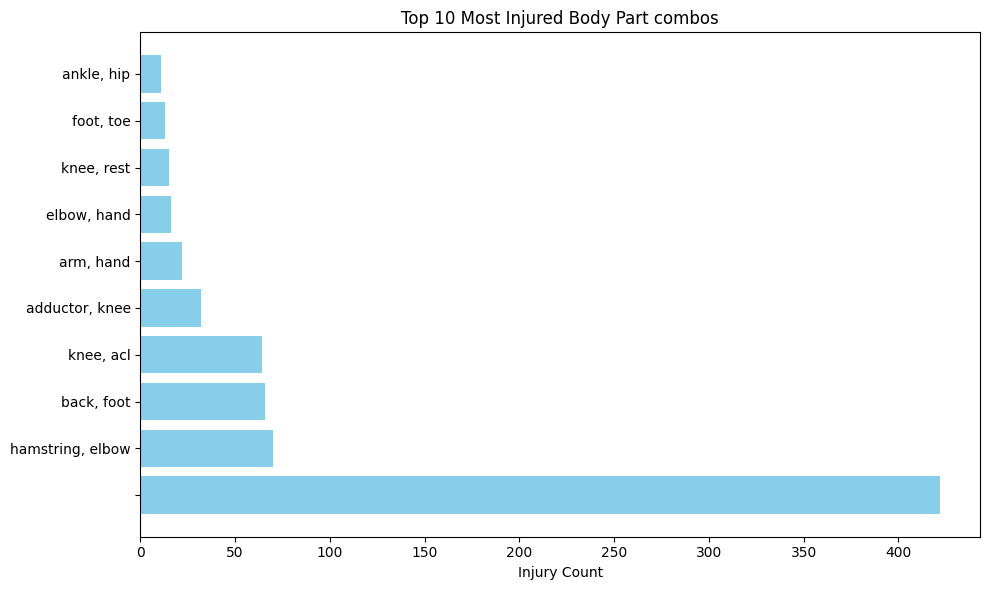

In [ ]:
# Example: top 10 body parts injured
df_top = df.groupby('BODY_PART').sum().nlargest(10, 'INJURY_COUNT').reset_index()

plt.figure(figsize=(10,6))
plt.barh(df_top['BODY_PART'], df_top['INJURY_COUNT'], color='skyblue')
plt.xlabel('Injury Count')
plt.title('Top 10 Most Injured Body Part combos')
plt.tight_layout()

In [ ]:
query1 = """
    SELECT s.sport, COUNT(*) as injuries
FROM INJURY_SCHEMA.FCT_INJURIES as f
LEFT JOIN INJURY_SCHEMA.DIM_SPORT as s
ON s.sport_id = f.sport_id
HERE f.today_date = '2025-04-18 or f.today_date = '2025-04-19'
GROUP BY s.sport
ORDER BY COUNT(*) desc
"""

df1 = pd.read_sql(query1, conn)

/tmp/ipython-input-7-1760813476.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


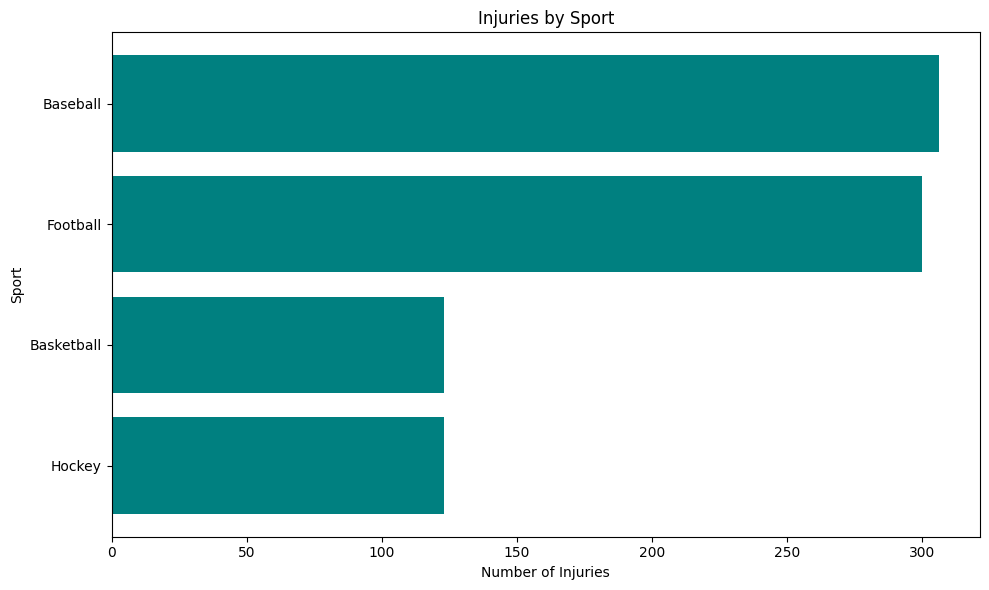

In [ ]:
# ✅ Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(df1['SPORT'], df1['INJURIES'], color='teal')
plt.xlabel('Number of Injuries')
plt.ylabel('Sport')
plt.title('Injuries by Sport')
plt.gca().invert_yaxis()  # Highest bar on top
plt.tight_layout()


# ✅ Optional: show in notebook/script
plt.show()

In [ ]:
query2 = """
    SELECT month(f.today_date) as INJURY_MONTH, s.sport as SPORT, COUNT(*) as INJURIES
FROM fct_injuries as f
LEFT JOIN dim_sport as s
ON s.sport_id = f.sport_id
WHERE f.today_date = '2025-04-18 or f.today_date = '2025-04-19'
GROUP BY injury_month, s.sport

"""

df2 = pd.read_sql(query2, conn)

/tmp/ipython-input-9-2293075080.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


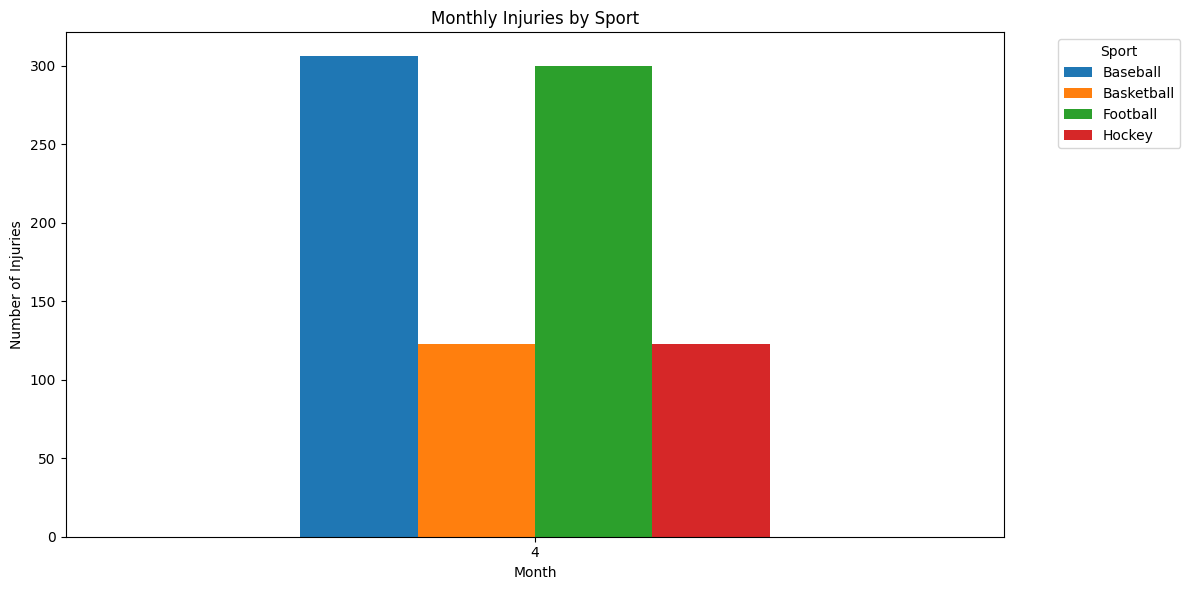

In [ ]:
# Pivot the data so each sport becomes a column
pivot_df = df2.pivot(index='INJURY_MONTH', columns='SPORT', values='INJURIES')

# Plot setup
pivot_df.plot(kind='bar', figsize=(12, 6))

plt.title('Monthly Injuries by Sport')
plt.xlabel('Month')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

In [ ]:
query3 = """
   SELECT d.PLAYER_NAME, COUNT(*) as injury_count
FROM dim_players as d
RIGHT JOIN fct_injuries as f
on d.player_id = f.PLAYER_ID
WHERE f.today_date = '2025-04-18 or f.today_date = '2025-04-19'
GROUP BY d.PLAYER_NAME, f.sport_id
ORDER BY COUNT(*) desc
LIMIT 10

"""

df3 = pd.read_sql(query3, conn)

/tmp/ipython-input-11-34957118.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


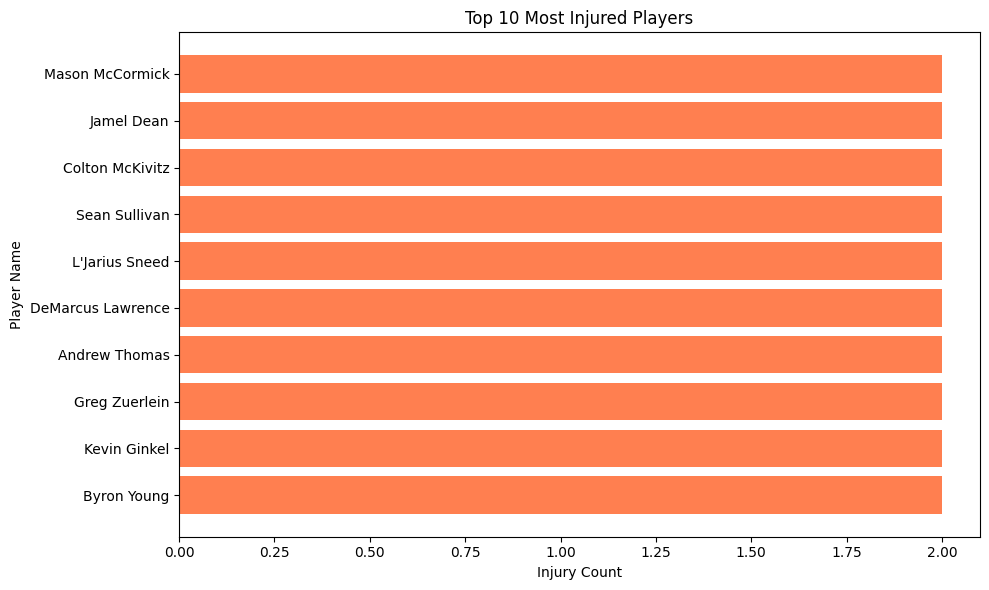

In [ ]:
# Plot: Top 10 most injured players
plt.figure(figsize=(10, 6))
plt.barh(df3['PLAYER_NAME'], df3['INJURY_COUNT'], color='coral')
plt.xlabel('Injury Count')
plt.ylabel('Player Name')
plt.title('Top 10 Most Injured Players')
plt.gca().invert_yaxis()  # So most injured player is at top
plt.tight_layout()

# Save the plot
plt.show()


In [ ]:
query4 = """
   SELECT s.sport as SPORT, s1.status as STATUS, COUNT(*) as INJURIES
FROM fct_injuries as f
LEFT JOIN dim_status as s1
ON f.status_id = s1.status_id
LEFT JOIN dim_sport as s
ON s.sport_id = f.sport_id
WHERE f.today_date = '2025-04-18 or f.today_date = '2025-04-19'
GROUP BY s.sport, s1.status
ORDER BY COUNT(*) desc
LIMIT 10


"""

df4 = pd.read_sql(query4, conn)

/tmp/ipython-input-13-2570599101.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df4 = pd.read_sql(query4, conn)


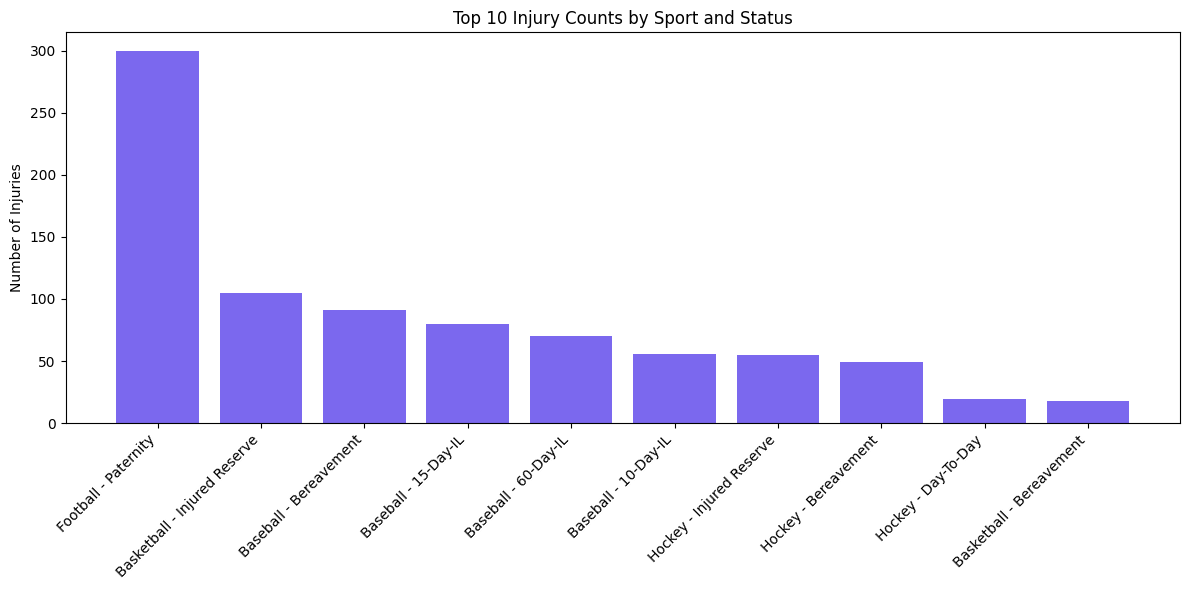

In [ ]:
# Create a new column for grouped x-axis labels
df4['label'] = df4['SPORT'] + ' - ' + df4['STATUS']

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df4['label'], df4['INJURIES'], color='mediumslateblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Injuries')
plt.title('Top 10 Injury Counts by Sport and Status')
plt.tight_layout()

# Save chart
plt.show()